## 6.4 Machine Learning Part 1

#### This script contains the following:
##### 1. Importing libraries and data
##### 2. Data cleaning
##### 3. Data prep for regression analysis
##### 4. Regression analysis

### 1. Import data and libraries

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [16]:
# Define path
path = r'C:\Users\Daniella\ACH6'

In [115]:
#data set
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun violence clean.csv'))

### 2. Data Cleaning:

In [117]:
df_gun.shape

(239677, 24)

In [135]:
df_gun.dtypes

Unnamed: 0                           int64
incident_id                          int64
date                        datetime64[ns]
state                             category
city_or_county                    category
address                             object
n_killed                             int64
n_injured                            int64
congressional_district             float64
gun_stolen                        category
gun_type                          category
incident_characteristics          category
latitude                           float64
location_description              category
longitude                          float64
n_guns_involved                    float64
participant_age                     object
participant_age_group             category
participant_gender                category
participant_relationship          category
participant_status                category
participant_type                  category
state_house_district                object
state_senat

In [123]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['longitude'] = pd.to_numeric(df_gun['longitude'], errors='coerce')

In [127]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['latitude'] = pd.to_numeric(df_gun['latitude'], errors='coerce')

In [129]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['congressional_district'] = pd.to_numeric(df_gun['congressional_district'], errors='coerce')

In [131]:
# Replace 'Unknown' with NaN (missing values) to convert these columns back to float64
df_gun['n_guns_involved'] = pd.to_numeric(df_gun['n_guns_involved'], errors='coerce')

In [133]:
# Changing Data Types:
df_gun[['date']] = df_gun[['date']].astype('datetime64[ns]')

# Change these columns to 'category' data type
columns_to_category = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics', 'location_description', 'participant_age_group', 'participant_gender', 'participant_relationship', 'participant_status', 'participant_type']

df_gun[columns_to_category] = df_gun[columns_to_category].astype('category')

In [137]:
df_gun = df_gun.drop(columns=["Unnamed: 0"])

In [139]:
# Replace missing values with the mean 
df_gun['latitude'] = df_gun['latitude'].fillna(df_gun['latitude'].mean())
df_gun['longitude'] = df_gun['longitude'].fillna(df_gun['longitude'].mean())

In [141]:
# Replace missing values with the median:
df_gun['n_guns_involved'] = df_gun['n_guns_involved'].fillna(df_gun['n_guns_involved'].median())

In [143]:
# Replace missing values with the mode:
df_gun['congressional_district'] = df_gun['congressional_district'].fillna(df_gun['congressional_district'].mode()[0])

In [145]:
# Checking for missing values:
missing_values = df_gun.isnull().sum()
print(missing_values)

incident_id                 0
date                        0
state                       0
city_or_county              0
address                     0
n_killed                    0
n_injured                   0
congressional_district      0
gun_stolen                  0
gun_type                    0
incident_characteristics    0
latitude                    0
location_description        0
longitude                   0
n_guns_involved             0
participant_age             0
participant_age_group       0
participant_gender          0
participant_relationship    0
participant_status          0
participant_type            0
state_house_district        0
state_senate_district       0
dtype: int64


In [147]:
df_gun.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Nan,Unknown,...,-79.8559,1.0,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unknown,Unknown
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,Nan,Unknown,...,-118.3330,1.0,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,Nan,Unknown,...,-104.8020,1.0,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


### 3. Data prep for regression analysis

##### Hypothesis: Incidents with fewer guns (1-3 guns) result in fewer deaths.

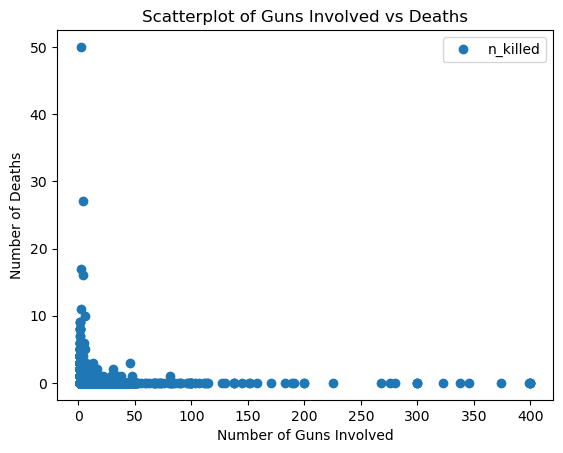

In [154]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_gun.plot(x = 'n_guns_involved', y='n_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Scatterplot of Guns Involved vs Deaths')  
plt.xlabel('Number of Guns Involved')  
plt.ylabel('Number of Deaths')  
plt.show()

In [156]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_gun['n_guns_involved'].values.reshape(-1,1)
y = df_gun['n_killed'].values.reshape(-1,1)

In [158]:
X

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [2.]])

In [160]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [162]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [165]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [171]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [173]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

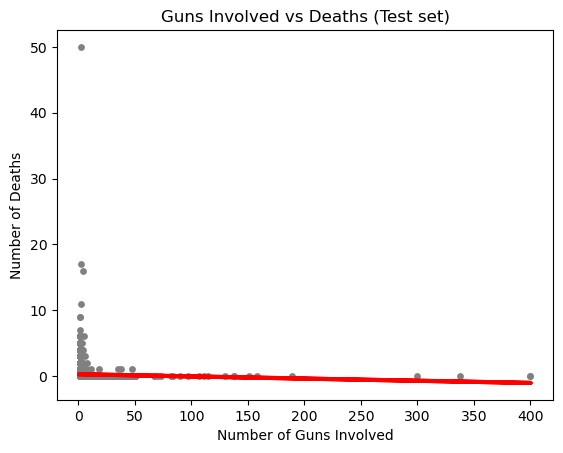

In [175]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Guns Involved vs Deaths (Test set)')
plot_test.xlabel('Number of Guns Involved')
plot_test.ylabel('Number of Deaths')
plot_test.show()

In [177]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [179]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00329439]]
Mean squared error:  0.30351684919689714
R2 score:  0.00034018721101947147


In [181]:
y_predicted

array([[0.25174024],
       [0.25174024],
       [0.25174024],
       ...,
       [0.25174024],
       [0.25174024],
       [0.25174024]])

In [183]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.25174
1,4,0.25174
2,0,0.25174
3,0,0.25174
4,0,0.25174
5,0,0.25174
6,0,0.25174
7,1,0.25174
8,0,0.25174
9,0,0.25174


##### Compare how the regression fits the training set

In [186]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [188]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [190]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00329439]]
Mean squared error:  0.2586626892982443
R2 score:  0.0005418079642981466


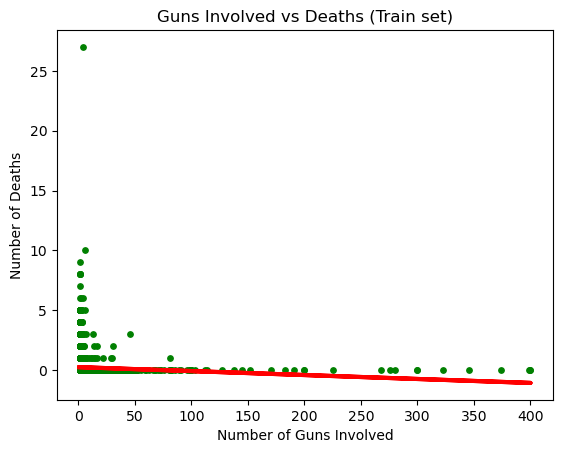

In [192]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Guns Involved vs Deaths (Train set)')
plot_test.xlabel('Number of Guns Involved')
plot_test.ylabel('Number of Deaths')
plot_test.show()

##### Slope: Both sets have the same slope [[-0.00329439]] which means the relationship between the independent and dependent variables is really  weak in both sets.
##### Mean squared error: The test set has a slightly higher error, but the difference isn’t huge, so the model’s generalization is okay.
##### R2 score: Both scores are close to zero, which means the model doesn't explain the patterns in either dataset at all. Overall we can say that linear relationship here is basically nonexistent. 